<a href="https://colab.research.google.com/github/abidhikri/tugas13/blob/main/tubes%20sko%20fix%20grafik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUBES SKO
UJI RISE TIME BUDGET DAN LINK POWER BUDGET

In [270]:
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [336]:
#-- Kabel Fiber optik G.652 - SI-SM, Spesifikasi Kabel yang harus dipunya.
L=np.arange(1,26,1) #km << Jarak link seluruhnya, batas agar diketahui RTB terpenuhi ialah 77KM.
Hspl=2 #km << jarak kabel yang disambungkan
disp_M=3.5e-12 #s/km.nm (dispersi material)
alpha_f=0.3 #dB/km << Redaman serat optik


In [337]:
##-- Pengirim (sumber cahaya)
Ptx=3 #mw << Daya yang dikirimkan LASER/LED pada Fiber Optik
Ptx_db=5 #dBw
spektral=0.1 #nm << Lebar spektral
t_tx=60e-12 #s << Risetime TX
Mod_NRZ=0.7 #NRZ << Modulasi NRZ
Mod_RZ=0.35 #RZ << Modulasi RZ
Br= 2.5e9 #2.5 Gbps << Bitrate(GPON umum)
Tb=1/Br #s << Time Bit, perdetik 2 milyar bit yang dikirimkan

In [338]:
#-- Pengirim
sensitivitas=-27 #dBm << kalau ada daya terima datang kurang dari sensitivtas, maka tidak terpenuhi LPB
t_rx=35e-12 #s << rise time pd rx

In [339]:
#-- Redaman KanaL
N_c=2 # << konektor, Jumlah Konektor karena P2P maka tidak ada konektor ditengah2nya.
alpha_c=0.2 #0.1 dB/titik
N_sp=(L/Hspl)-1 # << jummlah splice, (Panjang kabel/Haspel)-1
alpha_sp=0.1 #dB/titik << Redaman persplice
Ms=8 #dB << Redaman tidak terduga

#LINK POWER BUDGET
menggunakan Rumus

$$\alpha_T=2\alpha_c+N{sp}\alpha_{sp}+L\alpha_f+M_s$$

In [340]:
alpha_t=N_c*alpha_c+N_sp*alpha_sp+L*alpha_f+Ms

In [356]:
#daya terima
Prx=Ptx_db-alpha_t

In [357]:
Prx

array([ -3.65,  -4.  ,  -4.35,  -4.7 ,  -5.05,  -5.4 ,  -5.75,  -6.1 ,
        -6.45,  -6.8 ,  -7.15,  -7.5 ,  -7.85,  -8.2 ,  -8.55,  -8.9 ,
        -9.25,  -9.6 ,  -9.95, -10.3 , -10.65, -11.  , -11.35, -11.7 ,
       -12.05])

In [358]:
#(if Prx > sensitivitas:
#   print("LPB,terpenuhi")
#else:
#   print("Hitung Ulang yaaa")

# RISE TIME BUDGET (MEMBANDINGKAN DISPERSI)

$$t_{sys}=\sqrt{t_tx}^2+t_{mat}^2+t_{mod}^2+t_{wg}^2+t_{rx}}. $$

In [359]:
t_mat=disp_M*L*spektral
t_wg=0 #diabaikan
t_mod=0 #SM karena menggunakan kabel tidak lebih dari 1

t_sys=np.sqrt(t_tx**2+
           t_mat**2+
           t_mod**2+
           t_wg**2+
           t_rx**2)

#t_mat = t material
#t_wg = t 
#t_mod = t modulasi

In [360]:
t_sys

array([6.94631017e-11, 6.94657470e-11, 6.94701555e-11, 6.94763269e-11,
       6.94842608e-11, 6.94939566e-11, 6.95054135e-11, 6.95186306e-11,
       6.95336070e-11, 6.95503415e-11, 6.95688328e-11, 6.95890796e-11,
       6.96110803e-11, 6.96348332e-11, 6.96603366e-11, 6.96875886e-11,
       6.97165870e-11, 6.97473297e-11, 6.97798144e-11, 6.98140387e-11,
       6.98500000e-11, 6.98876956e-11, 6.99271228e-11, 6.99682785e-11,
       7.00111598e-11])

In [361]:
t_tx

6e-11

Text(0.5, 1.0, 'Kurva Link Power Budget')

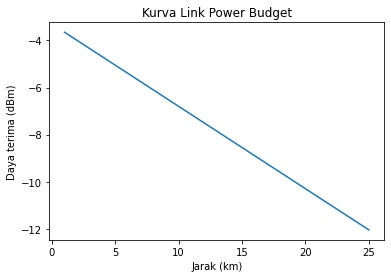

In [362]:
plt.plot(L,Prx) #untuk menampilkan gambar (jarak terhadap daya diterima, semakin jauh jarak semakin turun dayanya)
plt.xlabel("Jarak (km)") #agar lebih jelas grafik dari jarak
plt.ylabel('Daya terima (dBm)') #agar lebih jelas grafik dari daya terima
plt.title("Kurva Link Power Budget") #untuk memperjelas grafik

Text(0.5, 1.0, 'Kurva Rise Time Budget')

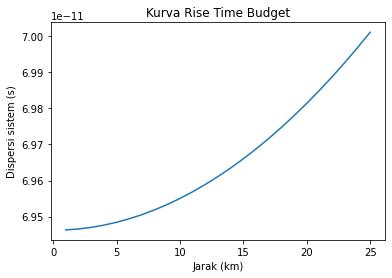

In [363]:
plt.plot(L,t_sys) #untuk menampilkan gambar (jarak terhadap daya diterima, semakin jauh jarak dispersi semakin besar dan jelek, akan terjadinya interperens)
plt.xlabel("Jarak (km)") #agar lebih jelas grafik dari jarak
plt.ylabel('Dispersi sistem (s)') #agar lebih jelas grafik dari daya terima
plt.title("Kurva Rise Time Budget") #untuk memperjelas grafik